# Example to use the Gamma-py plugin with the JeSeT interface

In this tutorial we show how to import a jetset model into Gamma-py, and finally we perform a model fitting with Gamma-py. To run this plugin you have to install Gamma-py
https://docs.gammapy.org/0.19/getting-started/install.html

In [1]:
import astropy.units as u
import  numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 80

from jetset.gammapy_plugin import GammapyJetsetModelFactory
from jetset.jet_model import Jet
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


## Importing a jetset model into gammapy

In [2]:
jet=Jet()

===> setting C threads to 12


In [3]:
jet.parameters

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str12,str16,str21,object,float64,float64,float64,bool,bool
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False


None

In [4]:
gammapy_jet_model=GammapyJetsetModelFactory(jet)
gammapy_jet_model.parameters.to_table()

===> setting C threads to 12


type,name,value,unit,error,min,max,frozen,is_norm,link,prior
str1,str16,float64,str4,float64,float64,float64,bool,bool,str1,str1
,gmin,2.0000e+00,,0.000e+00,1.000e+00,1.000e+09,False,False,,
,gmax,1.0000e+06,,0.000e+00,1.000e+00,1.000e+15,False,False,,
,N,1.0000e+02,cm-3,0.000e+00,0.000e+00,nan,False,False,,
,gamma_cut,1.0000e+04,,0.000e+00,1.000e+00,1.000e+09,False,False,,
,p,2.0000e+00,,0.000e+00,-1.000e+01,1.000e+01,False,False,,
,R,5.0000e+15,cm,0.000e+00,1.000e+03,1.000e+30,False,False,,
,R_H,1.0000e+17,cm,0.000e+00,0.000e+00,nan,True,False,,
,B,1.0000e-01,G,0.000e+00,0.000e+00,nan,False,False,,
,NH_cold_to_rel_e,1.0000e+00,,0.000e+00,0.000e+00,nan,True,False,,


let's verify that parameters are updated

In [5]:
gammapy_jet_model.R.value=1E15
gammapy_jet_model.N.value=1E4

gammapy_jet_model.p.value=1.5


In [6]:
gammapy_jet_model.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link,prior
str1,str16,float64,str4,float64,float64,float64,bool,bool,str1,str1
,gmin,2.0000e+00,,0.000e+00,1.000e+00,1.000e+09,False,False,,
,gmax,1.0000e+06,,0.000e+00,1.000e+00,1.000e+15,False,False,,
,N,1.0000e+04,cm-3,0.000e+00,0.000e+00,nan,False,False,,
,gamma_cut,1.0000e+04,,0.000e+00,1.000e+00,1.000e+09,False,False,,
,p,1.5000e+00,,0.000e+00,-1.000e+01,1.000e+01,False,False,,
,R,1.0000e+15,cm,0.000e+00,1.000e+03,1.000e+30,False,False,,
,R_H,1.0000e+17,cm,0.000e+00,0.000e+00,nan,True,False,,
,B,1.0000e-01,G,0.000e+00,0.000e+00,nan,False,False,,
,NH_cold_to_rel_e,1.0000e+00,,0.000e+00,0.000e+00,nan,True,False,,


### plotting with gammapy

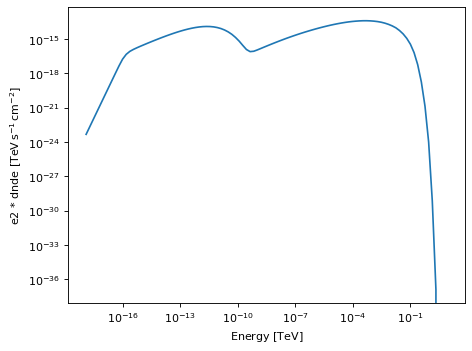

In [7]:
p=gammapy_jet_model.plot(energy_bounds=[1E-18, 10] * u.TeV,energy_power=2)

### plotting with jetset

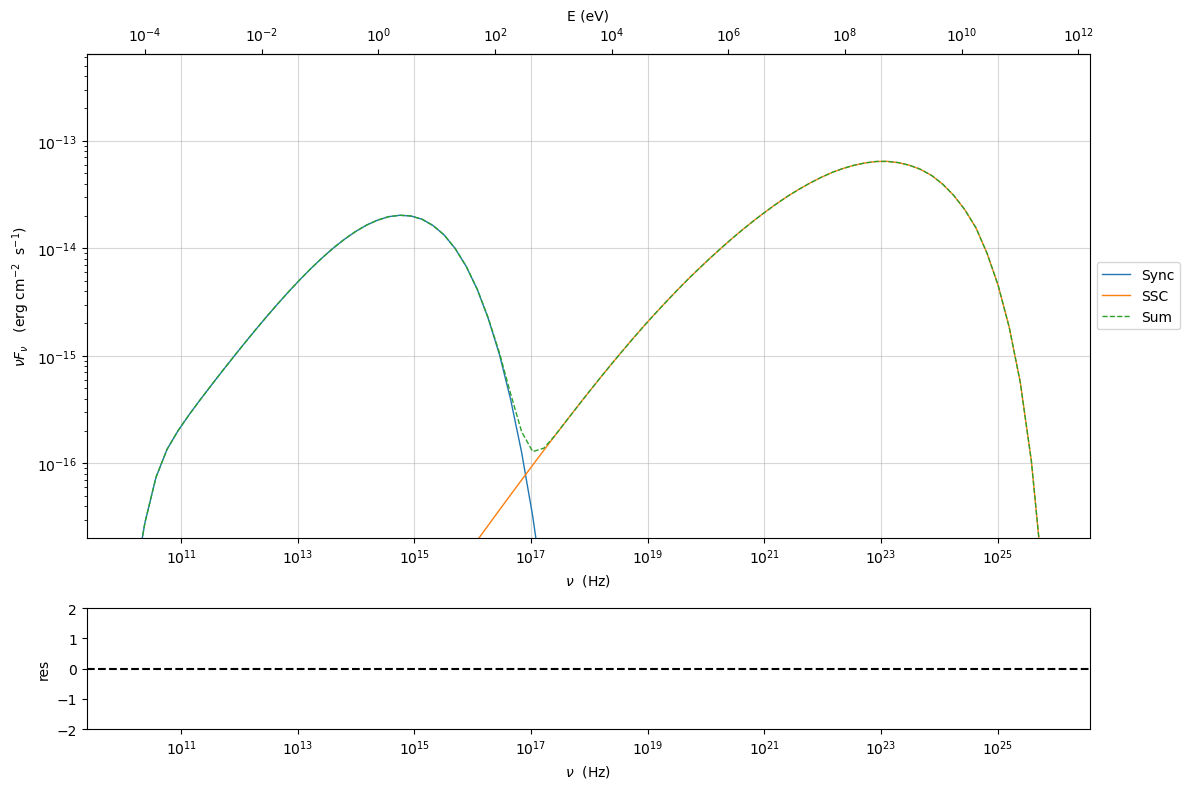

In [8]:
gammapy_jet_model.jetset_model.plot_model()

## Model fitting with gammapy


***  binning data  ***
---> N bins= 179
---> bin_widht= 0.1
msk [False  True  True False False  True False  True  True  True  True  True
 False  True  True False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True  True  True  True  True  True False  True  True
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True False
 False  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False  True False False False  True False False False
  True False False False  True False False False  True Fals

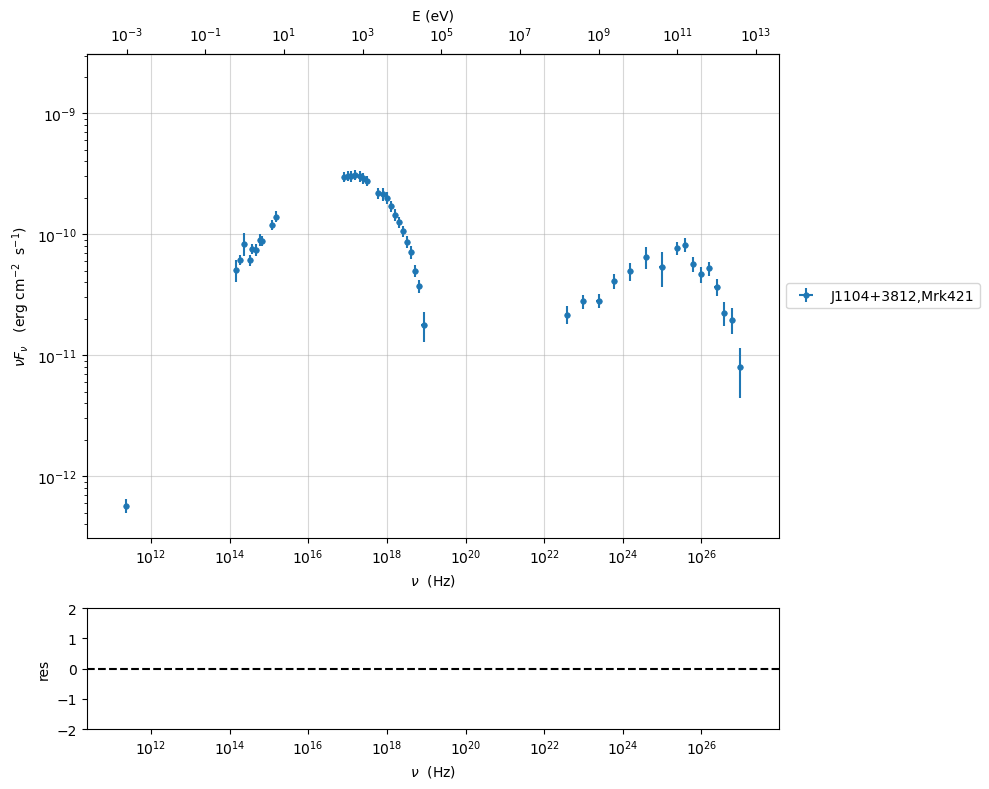

In [9]:
%matplotlib inline
data=Data.from_file(test_SEDs[1])
sed_data=ObsData(data_table=data)
sed_data.group_data(bin_width=0.1)

sed_data.add_systematics(0.1,[10.**6,10.**29])
p=sed_data.plot_sed()


*** evaluating spectral indices for data ***



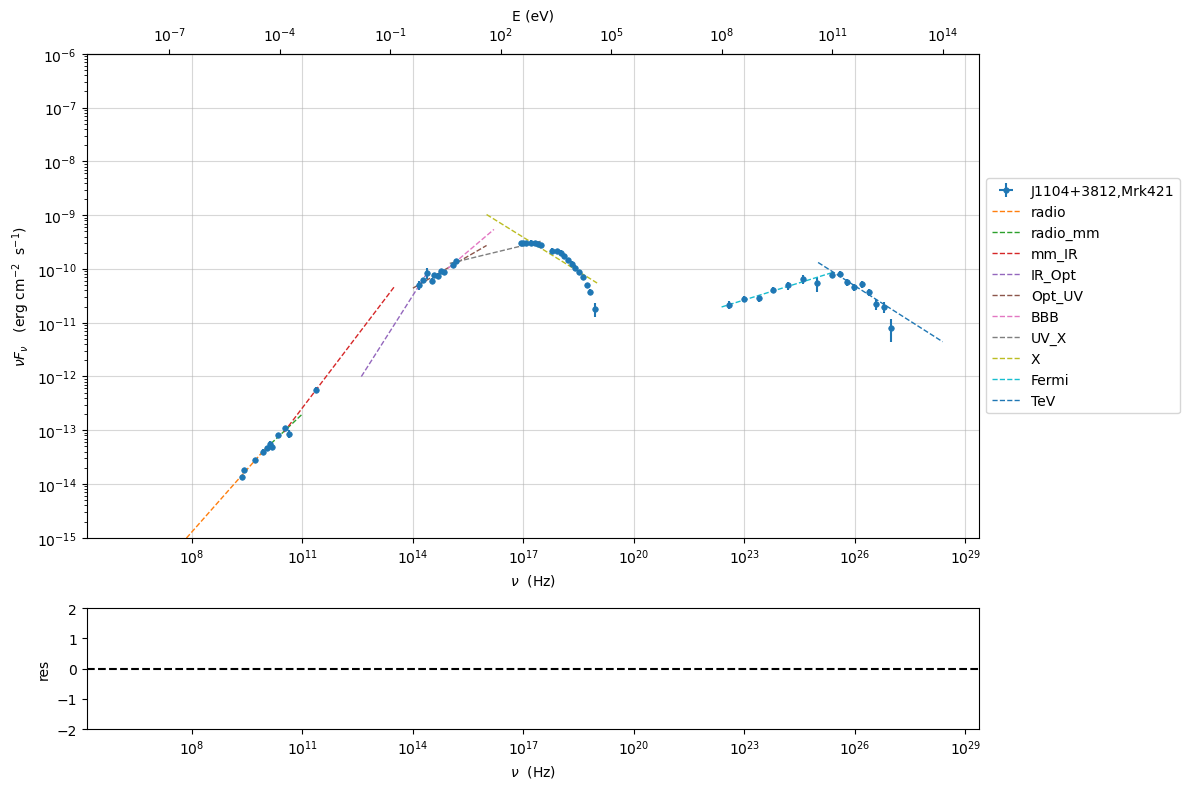

In [10]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(minimizer='lsb',silent=True)
p=my_shape.plot_indices()
p.setlim(y_min=1E-15,y_max=1E-6)

In [11]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=False,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10.,21.])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10.0, 21.0]
---> class:  HSP





model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str8,str2,float64,float64,float64,float64,float64,float64,float64,bool
LogCubic,b,-1.654034e-01,-1.654034e-01,4.639280e-03,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-1.194746e-02,-1.194746e-02,6.870736e-04,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,1.673186e+01,1.673186e+01,1.710428e-02,--,1.668578e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-9.478048e+00,-9.478048e+00,1.351655e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


---> sync       nu_p=+1.673186e+01 (err=+1.710428e-02)  nuFnu_p=-9.478048e+00 (err=+1.351655e-02) curv.=-1.654034e-01 (err=+4.639280e-03)




*** Log-Polynomial fitting of the IC component ***
---> fit range: [23.0, 29.0]
---> LogCubic fit
====> simplex
====> migrad
====> simplex
====> migrad
====> simplex
====> migrad




model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str8,str2,float64,float64,float64,float64,float64,float64,float64,bool
LogCubic,b,-2.003642e-01,-2.003642e-01,2.690887e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-4.156240e-02,-4.156240e-02,2.110793e-02,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.522232e+01,2.522232e+01,1.174807e-01,--,2.529619e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.012086e+01,-1.012086e+01,3.053770e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


---> IC         nu_p=+2.522232e+01 (err=+1.174807e-01)  nuFnu_p=-1.012086e+01 (err=+3.053770e-02) curv.=-2.003642e-01 (err=+2.690887e-02)



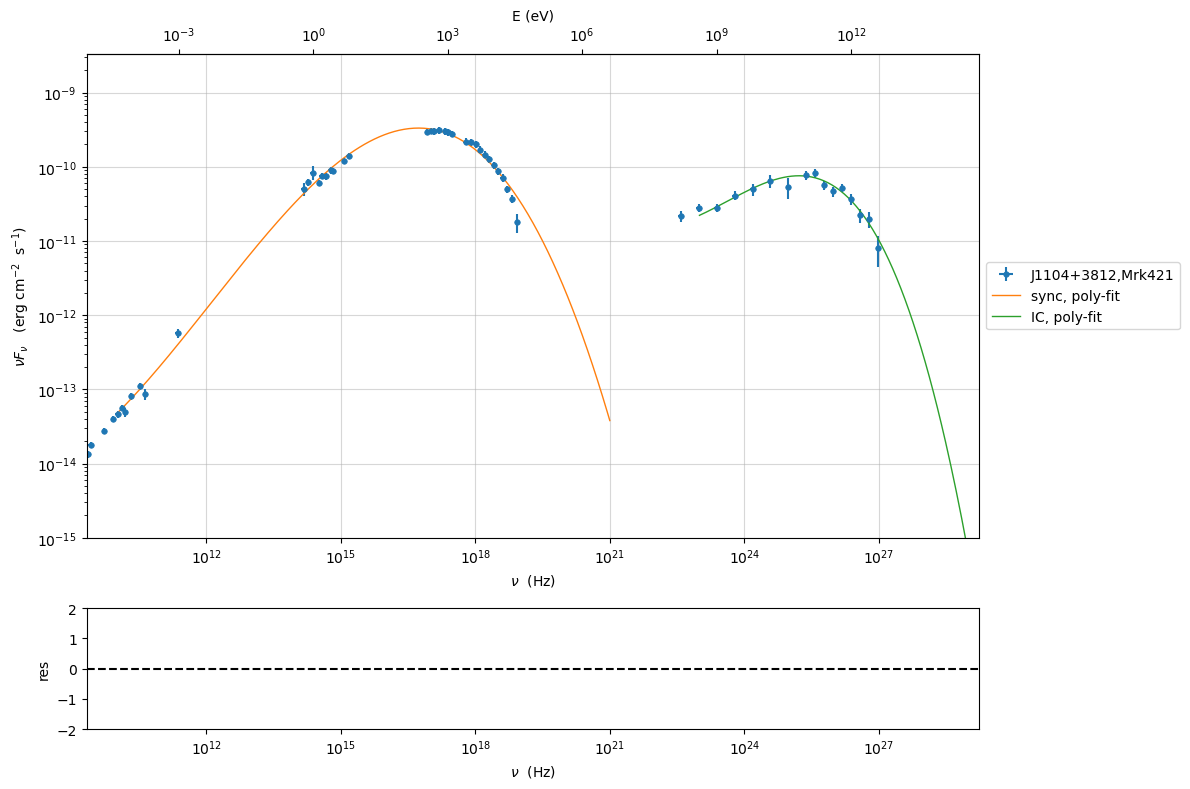

In [12]:
my_shape.IC_fit(fit_range=[23.,29.],minimizer='minuit',silent=True)
p=my_shape.plot_shape_fit()
p.setlim(y_min=1E-15)

In [13]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E12,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False,silent=True)
prefit_jet.save_model('prefit_jet.pkl')


***  constrains parameters from observable ***

===> setting C threads to 12


/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/obs_constrain.py:1150: RankWarning: Polyfit may be poorly conditioned
  p=polyfit(nu_p_IC_model_log,B_grid_log,2)


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str12,str16,str21,object,float64,float64,float64,bool,bool
jet_leptonic,R,region_size,cm,3.484042e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,5.050000e-02,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,2.500000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,3.080000e-02,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,4.697542e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.373160e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,6.040733e-01,0.000000e+00,--,False,False


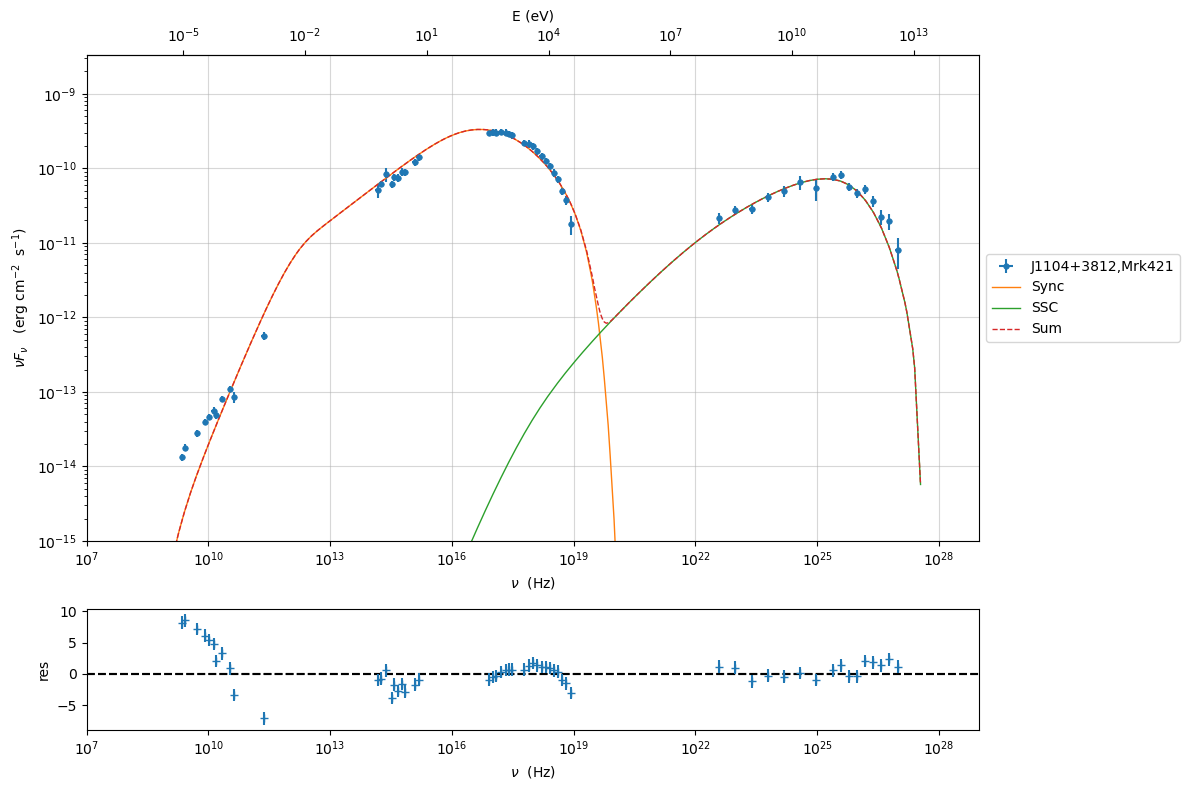

In [14]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_model_residual_plot(prefit_jet,sed_data)
pl.setlim(y_min=1E-15,x_min=1E7,x_max=1E29)

### setting gammapy jetset model

We import the model to gammapy and we set min/max values. Notice that gammapy has not fit_range, but uses only min/max.

We importing a jetset model with `fit_range` defined, these will automatically update the gammapy min/max parameters attributes

In [15]:
jet=Jet.load_model('prefit_jet.pkl')
jet.parameters.z_cosm.freeze()
jet.parameters.R_H.freeze()
jet.parameters.R.freeze()
jet.parameters.gmin.freeze()
#jet.parameters.R.fit_range=[5E15,1E17]
#jet.parameters.gmin.fit_range=[10,1000]
jet.parameters.gmax.fit_range=[1E5,1E7]
jet.parameters.s.fit_range=[1,3]
jet.parameters.r.fit_range=[0,5]
jet.parameters.B.fit_range=[1E-4,1]
jet.parameters.N.fit_range=[1E-3,10]
jet.parameters.gamma0_log_parab.fit_range=[1E3,1E5]
jet.parameters.beam_obj.fit_range=[5,50]

gammapy_jet_model=GammapyJetsetModelFactory(jet)

===> setting C threads to 12
===> setting C threads to 12


In [16]:
gammapy_jet_model.parameters.to_table()


type,name,value,unit,error,min,max,frozen,is_norm,link,prior
str1,str16,float64,str4,float64,float64,float64,bool,bool,str1,str1
,gmin,4.6975e+02,,0.000e+00,1.000e+00,1.000e+09,True,False,,
,gmax,1.3732e+06,,0.000e+00,1.000e+05,1.000e+07,False,False,,
,N,6.0407e-01,cm-3,0.000e+00,1.000e-03,1.000e+01,False,False,,
,gamma0_log_parab,3.4044e+04,,0.000e+00,1.000e+03,1.000e+05,False,False,,
,s,2.1635e+00,,0.000e+00,1.000e+00,3.000e+00,False,False,,
,r,8.2702e-01,,0.000e+00,0.000e+00,5.000e+00,False,False,,
,R,3.4840e+16,cm,0.000e+00,1.000e+03,1.000e+30,True,False,,
,R_H,1.0000e+17,cm,0.000e+00,0.000e+00,nan,True,False,,
,B,5.0500e-02,G,0.000e+00,1.000e-04,1.000e+00,False,False,,


In [17]:
_=gammapy_jet_model.evaluate()


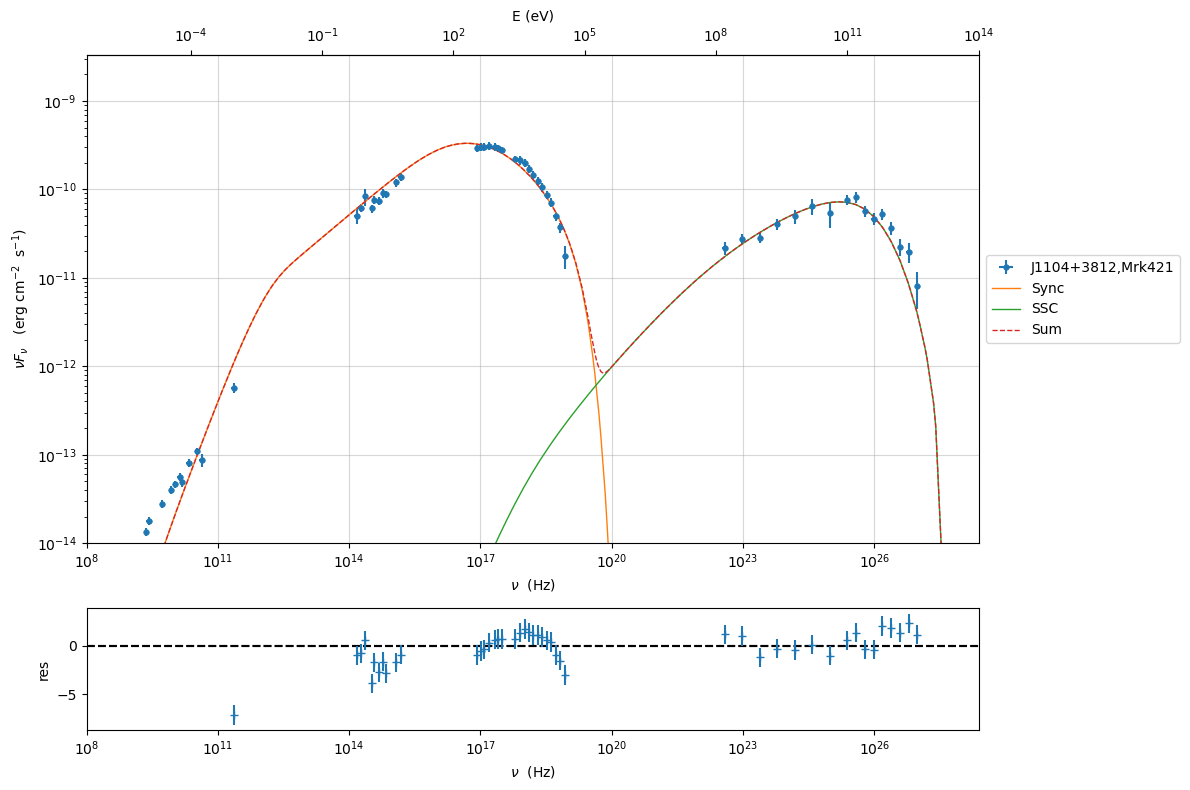

In [18]:
p=gammapy_jet_model.jetset_model.plot_model(sed_data=sed_data)
p.add_model_residual_plot(data=sed_data, model=jet,fit_range=[1E11,1E30])
p.setlim(x_min=1E8,y_min=1E-14)

### importing data to gammapy

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


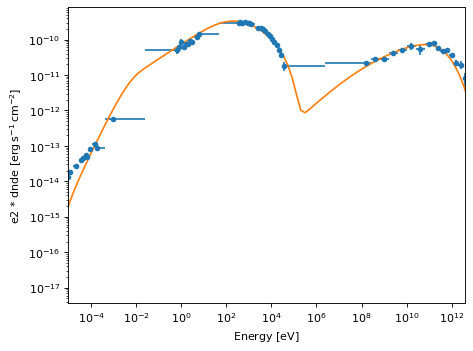

In [19]:
from gammapy.estimators import FluxPoints

fp=FluxPoints.from_table(sed_data.gammapy_table,sed_type='e2dnde', format='gadf-sed')
p=fp.plot(sed_type='e2dnde')
p=gammapy_jet_model.plot(energy_bounds=[1E-18, 10] * u.TeV,energy_power=2)

plt.show()

In [20]:
sed_data.gammapy_table.meta

OrderedDict([('z', 0.0308),
             ('obj_name', 'J1104+3812,Mrk421'),
             ('restframe', 'obs'),
             ('data_scale', 'lin-lin'),
             ('UL_CL', 0.95),
             ('SED_TYPE', 'e2dnde')])

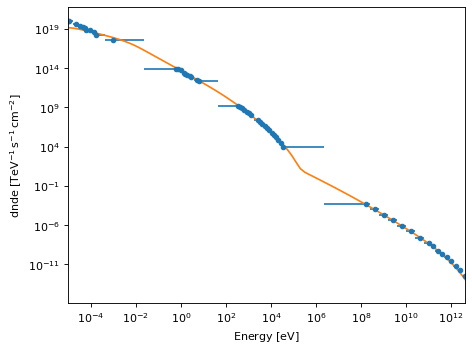

In [21]:
p=fp.plot(sed_type='dnde')
p=gammapy_jet_model.plot(energy_bounds=[1E-18, 10] * u.TeV,energy_power=0)

plt.show()

### building gammapy SkyModel

we build the SkyModel, and we degrade the pre-fit model quality

SkyModel

  Name                      : SSC model Mrk 421
  Datasets names            : None
  Spectral model type       : GammapyJetsetModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    gmin                  (frozen):    469.754                   
    gmax                          : 1373159.756  +/-    0.00             
    N                             :      2.000   +/-    0.00 1 / cm3     
    gamma0_log_parab              :  34044.032   +/-    0.00             
    s                             :      2.163   +/-    0.00             
    r                             :      0.500   +/-    0.00             
    R                     (frozen): 34840420166069272.000      cm          
    R_H                   (frozen): 100000000000000000.000       cm          
    B                             :      0.051   +/-    0.00 gauss       
    NH_cold_to_rel_e      (frozen):      1.000                   
    beam_obj                      :     20.000   +/-

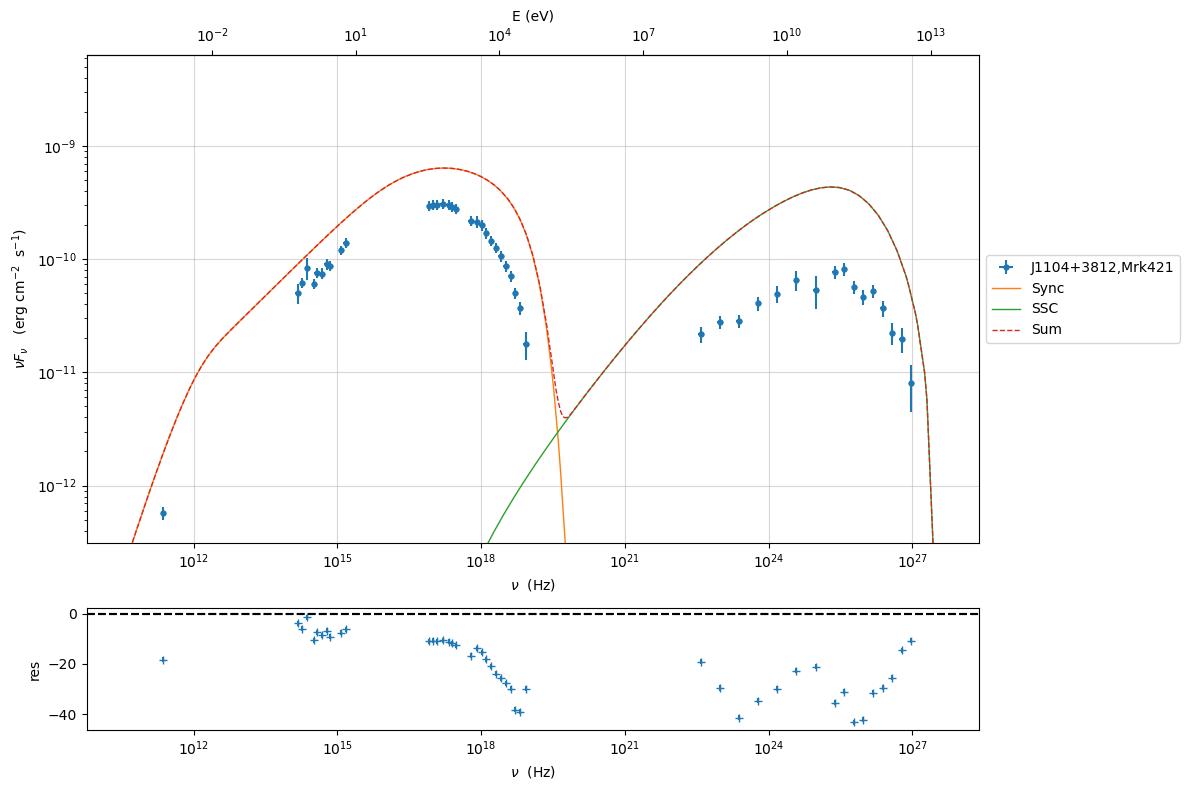

In [22]:

from gammapy.modeling.models import SkyModel
sky_model = SkyModel(name="SSC model Mrk 421", spectral_model=gammapy_jet_model)
gammapy_jet_model.N.value=2.0
gammapy_jet_model.r.value=0.5   
gammapy_jet_model.beam_obj.value=20
print(sky_model)
gammapy_jet_model.evaluate()
p=gammapy_jet_model.jetset_model.plot_model(sed_data=sed_data)
p.add_model_residual_plot(data=sed_data, model=gammapy_jet_model.jetset_model,fit_range=[1E11,1E30])



### setting gammapy Datasets and Fit classes, and running the fit

In [23]:
from gammapy.datasets import FluxPointsDataset,Datasets
datasets = Datasets()
E_min_fit = (1e11 * u.Hz).to("eV", equivalencies=u.spectral())
fp=FluxPoints.from_table(sed_data.gammapy_table,sed_type='e2dnde', format='gadf-sed')
dataset_mrk421 = FluxPointsDataset(data=fp,models=sky_model)

#this workaround was needed with version 1.2
dataset_mrk421.mask_fit= dataset_mrk421.data.energy_ref >= E_min_fit
dataset_mrk421.mask_fit=dataset_mrk421.mask_fit.reshape(dataset_mrk421.mask_safe.shape)

datasets = Datasets(dataset_mrk421)
datasets.models=sky_model

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


In [24]:
dataset_mrk421.mask_fit.shape

(56, 1, 1)

In [25]:
from gammapy.modeling import Fit

#conf_dict=dict(tol=1E-8)
            

fitter = Fit(backend='scipy')#,optimize_opts=conf_dict)


In [26]:
results = fitter.run(datasets=datasets)
print(results)

===> setting C threads to 12


No covariance estimate - not supported by this backend.


OptimizeResult

	backend    : scipy
	method     : scipy
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 1307
	total stat : 38.09




In [27]:
results.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link,prior
str1,str16,float64,str4,float64,float64,float64,bool,bool,str1,str1
,gmin,4.6975e+02,,0.000e+00,1.000e+00,1.000e+09,True,False,,
,gmax,9.7813e+05,,0.000e+00,1.000e+05,1.000e+07,False,False,,
,N,5.2594e-01,cm-3,0.000e+00,1.000e-03,1.000e+01,False,False,,
,gamma0_log_parab,3.5520e+04,,0.000e+00,1.000e+03,1.000e+05,False,False,,
,s,2.0751e+00,,0.000e+00,1.000e+00,3.000e+00,False,False,,
,r,7.8628e-01,,0.000e+00,0.000e+00,5.000e+00,False,False,,
,R,3.4840e+16,cm,0.000e+00,1.000e+03,1.000e+30,True,False,,
,R_H,1.0000e+17,cm,0.000e+00,0.000e+00,nan,True,False,,
,B,4.9767e-02,G,0.000e+00,1.000e-04,1.000e+00,False,False,,


In [28]:
gammapy_jet_model.jetset_model.parameters

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str12,str16,str21,object,float64,float64,float64,bool,bool
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,4.697542e+02,1.000000e+00,1.000000e+09,False,True
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,9.781287e+05,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,5.259358e-01,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,3.552033e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,s,LE_spectral_slope,,2.075093e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,r,spectral_curvature,,7.862822e-01,-1.500000e+01,1.500000e+01,False,False
jet_leptonic,R,region_size,cm,3.484042e+16,1.000000e+03,1.000000e+30,False,True
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,4.976724e-02,0.000000e+00,--,False,False


None

note that this plot refers to the latest fit trial, in case, please consider storing the plot within a list in the  fit loop 

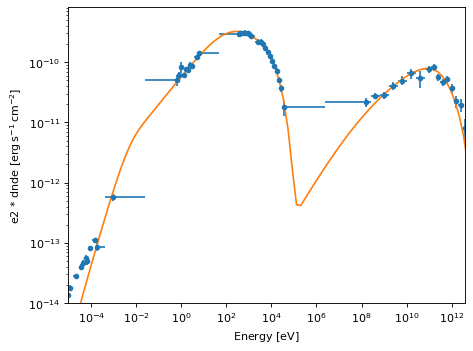

In [29]:
gammapy_jet_model.evaluate()
fp.plot(sed_type='e2dnde')
gammapy_jet_model.plot(energy_bounds=[1E-18, 10] * u.TeV,energy_power=2)
plt.ylim(1E-14)
plt.show()


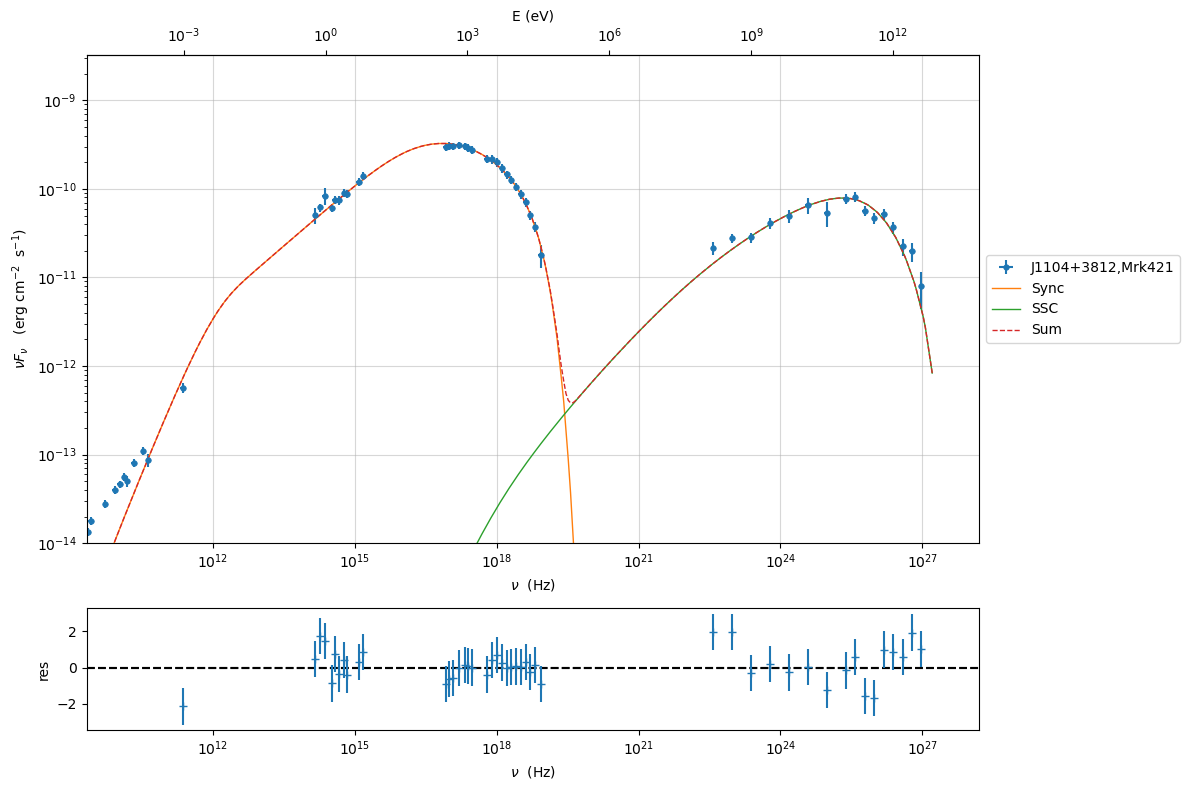

In [30]:
gammapy_jet_model.jetset_model.eval()
p=gammapy_jet_model.jetset_model.plot_model(sed_data=sed_data)
p.add_model_residual_plot(data=sed_data, model=gammapy_jet_model.jetset_model,
                                         fit_range=[1E11,1E30])
p.setlim(y_min=1E-14)


In [31]:
%timeit gammapy_jet_model.jetset_model.eval()

27.1 ms ± 357 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
%timeit gammapy_jet_model.evaluate()

28.8 ms ± 267 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
